### Customer_Shoping_Data RFM 분석

- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가



### 데이터셋 읽어와 정보들 확인하기

In [10]:
import pandas as pd

#읽어올 csv파일 경로
path  = './datasets/customer_shopping_data.csv'

#데이터셋 읽어 데이터 프레임화시키기 (데이터셋 확인해 구분점이 무엇인지 파악하고 sep키값에 구분점 전달)
customer_shoping_df = pd.read_csv(path)
print(type(customer_shoping_df))

#데아터프레임 정보 불어오기 -> 컬럼들, 컬럼마다 null카운트, Dtype , 메모리 샤용량
customer_shoping_df.info()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### 정보 분석(컬럼정보, 전체 데이터 확인)

> invoice_no : 송장 번호  
customer_id : 고객 pk  
gender : 성별  
age : 나이  
category ; 카테고리  
quantity : 갯수  
price : 가격  
payment_method : 결제 방식  
invoice_date : 송장 일자  
shopping_mall : 쇼핑몰




In [12]:
display(customer_shoping_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### 결측치 검사

In [23]:
#isnull()은 데이터 프레임 각 데이터에 값이 없다면 True, 있다면 False로 대체한 데이터 프레임을 리턴한다.
missing_values_df = customer_shoping_df.isnull()
missing_values_df

#sum에 axis에 따라 axis0은 열의 합, axis1은 행의합 출력 이때 false =0 , true는 1로 계산
#isnull()로 모든 데이터를 true 또는 false로 만들었다면 sum을 통해 결측치의 갯수를 알 수 있다.
missing_values = missing_values_df.sum(axis=0)
missing_values


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

### 중복행 검사

In [28]:
#duplcated()를 사용하면 행의 데이터가 같다면 True 다른 모든행과 같지 않다면 False를 만든 시리즈 리턴
customer_shoping_duplicated = customer_shoping_df.duplicated()
customer_shoping_duplicated

#시리즈의 sum()을 통해 중복행이 있나 없나 검사
customer_shoping_duplicated.sum()
#drop_duplicate() 에 어떤 열로 중복처리를 할것인지 전달하고 드랍된 데이터프레임을 리턴
customer_shoping_nonduplicated_category = customer_shoping_df.drop_duplicates(subset="category")
customer_shoping_nonduplicated_category

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,25/12/2022,Metrocity
12,I640508,C225330,Female,67,Toys,4,143.36,Debit Card,31/07/2022,Metrocity
23,I252275,C313348,Male,44,Technology,5,5250.00,Cash,26/10/2021,Kanyon
67,I204979,C173084,Female,24,Souvenir,5,58.65,Debit Card,14/03/2021,Istinye Park


### 분포도와 표준편차를 통해 이상치 검사

<Axes: xlabel='Index', ylabel='quantity'>

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,1.499005e+01,18.00,30.00,43.0,56.00,6.900000e+01
quantity,99457.0,100548.967966,3.170898e+07,1.00,2.00,3.0,4.00,1.000000e+10
price,99457.0,689.256321,9.411846e+02,5.23,45.45,203.3,1200.32,5.250000e+03
Index,99457.0,49728.000000,2.871091e+04,0.00,24864.00,49728.0,74592.00,9.945600e+04


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Index
0,I138884,C241288,Female,28,Clothing,NaN,1500.40,Credit Card,5/8/2022,Kanyon,0
1,I317333,C111565,Male,21,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul,1
2,I127801,C266599,Male,20,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity,2
3,I173702,C988172,Female,66,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM,3
4,I337046,C189076,Female,53,Books,4.0,60.60,Cash,24/10/2021,Kanyon,4
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5.0,58.65,Credit Card,21/09/2022,Kanyon,99452
99453,I325143,C569580,Male,27,Food & Beverage,2.0,10.46,Cash,22/09/2021,Forum Istanbul,99453
99454,I824010,C103292,Male,63,Food & Beverage,2.0,10.46,Debit Card,28/03/2021,Metrocity,99454
99455,I702964,C800631,Male,56,Technology,4.0,4200.00,Cash,16/03/2021,Istinye Park,99455


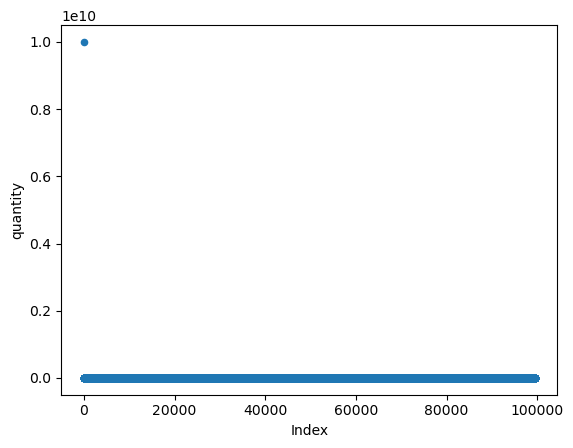

In [79]:
#분포도 표현
#이상치가 있다면 다음과 같이 분포가될 것
#이상치가 평균을 해하므로 평균보단 중앙값쓰는것을 고려,
index = customer_shoping_df.index
customer_shoping_df['Index'] = index
customer_shoping_df.loc[[0],"quantity"] =10000000000
display(customer_shoping_df.plot(x="Index",y="quantity",kind="scatter"))

#이상치가 있는지 확인하는 분포도 -> 이상치 존재하지 않음
# customer_shoping_df =pd.read_csv('./datasets/customer_shopping_data.csv')
# index = customer_shoping_df.index
# customer_shoping_df['Index'] = index
# display(customer_shoping_df.plot(x="Index",y="quantity",kind="scatter"))
# customer_shoping_df = customer_shoping_df.drop("Index",axis=1)

#표준편차 확인
display(customer_shoping_df.describe().T)

# 이상치로 인해 평균값이 이상함 -> 중앙값 사용
#이상치를 na값으로 바꾸기

customer_shoping_df.loc[[0],"quantity"] =None
customer_shoping_df

### 결측치를 데이터 탐색을 통해 선정된 대표값으로 채우기

In [84]:
#na값을 중앙값으로 채우기
#중앙값 구하기
median_quantity = customer_shoping_df[["quantity"]].median()
median_quantity

#fillna 로 결측치값 채우기
#inplaces 기본값은 False -> True로 해줘야 원본 데이터 변경
customer_shoping_df.fillna(median_quantity ,inplace=True)
customer_shoping_df

#컬럼별 결측치 개수 검사
customer_shoping_df.isnull().sum()


invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
Index             0
dtype: int64

### 데이터 전처리

In [155]:
from datetime import datetime
customer_shoping_df.describe().T

#Recency구하기
#1 같은 고객 있는지 검사
customer_shoping_df.duplicated("customer_id").sum() 
#2 송장일짜로 현날짜를 기준으로 Recency구하기
recency = (pd.to_datetime(datetime.now().date()) - pd.to_datetime(customer_shoping_df["invoice_date"],dayfirst=True))
customer_shoping_df["recency"] = recency
customer_shoping_df


#3 얼마나 자주 구매했는지를 전체 데이터에서 고객 번호로 검사 ->  고객번호중 중복이 없으므로 주어진 데이터셋에서 고객의 frequency는 모두 1임
frequency = customer_shoping_df["customer_id"].value_counts(dropna=True)
frequency = frequency.reset_index()
frequency
customer_shoping_df["frequency"] = frequency["count"]
customer_shoping_df

#총 구매한 금액 얼마나 구매했는지를 price와 quantity를 곱해 구하기 (금액이 총금액이아닌 한개의 금액이라고 가정)
monetary = customer_shoping_df["quantity"] * customer_shoping_df["price"]
monetary
customer_shoping_df["monetary"] = monetary
customer_shoping_df


#데이터셋에서 rfm만 추출

customer_shoping_df_rfm = customer_shoping_df[["customer_id","recency","frequency","monetary"]]
customer_shoping_df_rfm

#정규화를 통해 값의 범위를 0~로 모든 컬럼의데이터가 평등하게 만들어주기 

from sklearn.preprocessing import MinMaxScaler

#공식 공식 (X - MIN) / (MAX - MIN)

normalization = MinMaxScaler()

#datetime을 숫자로 변환
customer_shoping_df_rfm["recency"] = customer_shoping_df_rfm["recency"].astype("int64")
customer_shoping_df_rfm_normalized = normalization.fit_transform(customer_shoping_df_rfm[["recency","frequency","monetary"]])
customer_shoping_df_rfm_normalized = pd.DataFrame(customer_shoping_df_rfm_normalized,columns=customer_shoping_df_rfm.columns[1:4])
customer_shoping_df_rfm_normalized["customer_id"] = customer_shoping_df_rfm["customer_id"]
customer_shoping_df_rfm_normalized = customer_shoping_df_rfm_normalized[["customer_id","recency","frequency","monetary"]]
customer_shoping_df_rfm_normalized




C:\Users\82108\AppData\Local\Temp\ipykernel_29516\48711221.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_shoping_df_rfm["recency"] = customer_shoping_df_rfm["recency"].astype("int64")


,customer_id,recency,frequency,monetary
0,C241288,0.270101,0.0,0.171309
1,C111565,0.566583,0.0,0.205614
2,C266599,0.608040,0.0,0.011235
3,C988172,0.830402,0.0,0.571505
4,C189076,0.628141,0.0,0.009037
...,...,...,...,...
99452,C441542,0.211055,0.0,0.010974
99453,C569580,0.668342,0.0,0.000598
99454,C103292,0.891960,0.0,0.000598
99455,C800631,0.907035,0.0,0.639928
